# Probelm Statement

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made.

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib


import warnings
warnings.filterwarnings('ignore')

# loading DataSet

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')

In [3]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [4]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [5]:
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [6]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [7]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [8]:
df = df.replace('?','np.NaN')

In [9]:
fraud_reported = df['fraud_reported'].value_counts()

In [10]:
fraud_reported 

N    753
Y    247
Name: fraud_reported, dtype: int64

In [11]:
fraud=df['fraud_reported'].value_counts()
label_fraud = fraud.index
size_fraud = fraud.values

In [12]:
label_fraud

Index(['N', 'Y'], dtype='object')

In [13]:
size_fraud

array([753, 247], dtype=int64)

In [14]:
data=df.copy()

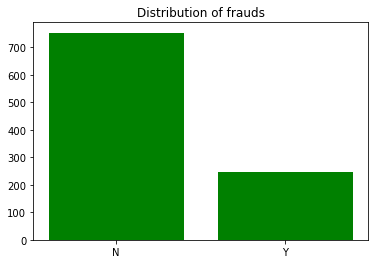

In [15]:
plt.bar(label_fraud,size_fraud,color='g')
plt.title('Distribution of frauds')
plt.show()

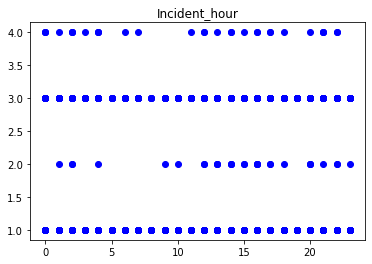

In [16]:
plt.scatter(df['incident_hour_of_the_day'],df['number_of_vehicles_involved'],color='b')
plt.title('Incident_hour')
plt.show()

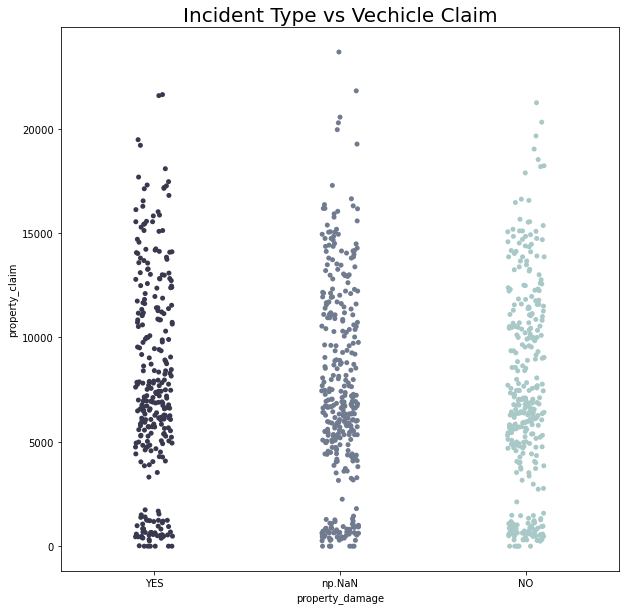

In [17]:
plt.rcParams['figure.figsize']=(10,10)

sns.stripplot(df['property_damage'],df['property_claim'],palette='bone')
plt.title('Incident Type vs Vechicle Claim',fontsize=20)
plt.show()

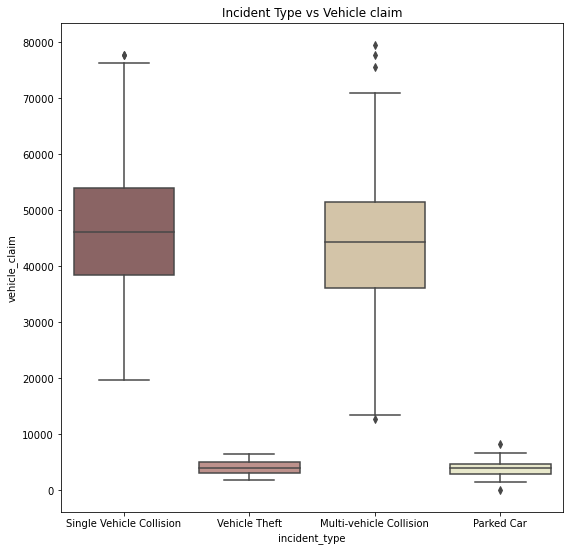

In [18]:
plt.rcParams['figure.figsize']=(9,9)

sns.boxplot(df['incident_type'],df['vehicle_claim'],palette='pink')
plt.title('Incident Type vs Vehicle claim')
plt.show()

In [19]:
incident = pd.crosstab(df['incident_city'],df['incident_type'])

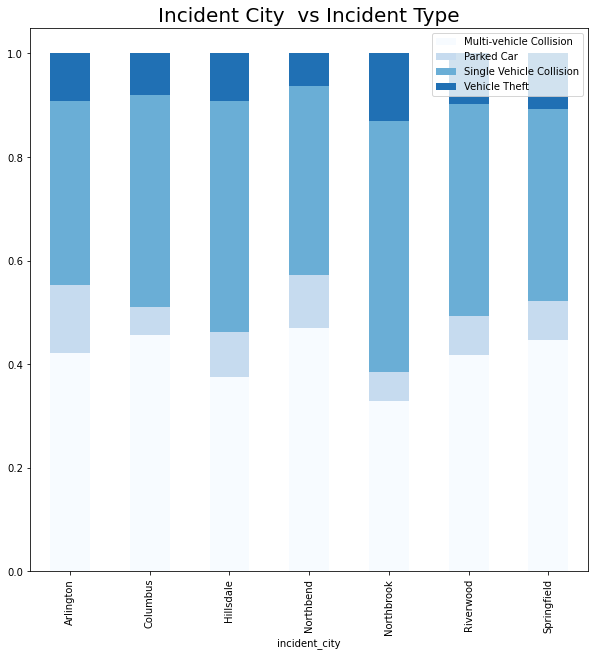

In [20]:
colors = plt.cm.Blues(np.linspace(0,1,5))
incident.div(incident.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(10,10),color=colors)
plt.title('Incident City  vs Incident Type',fontsize=20)
plt.legend()
plt.show()

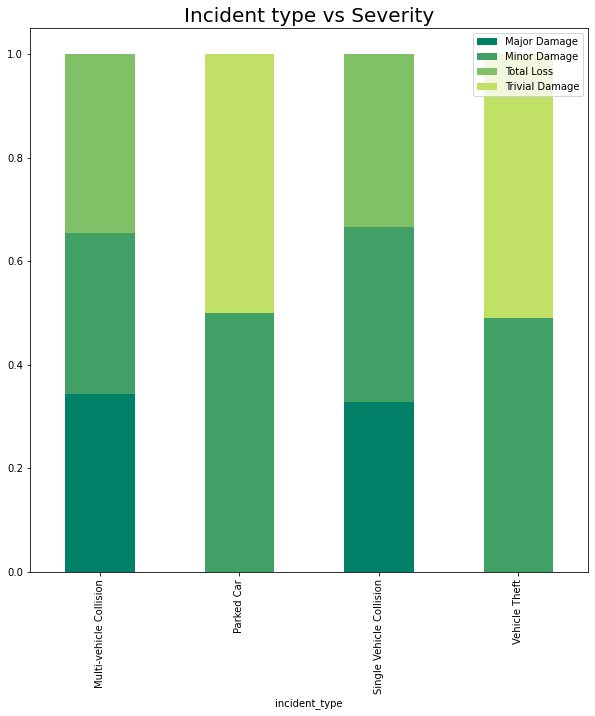

In [21]:
incident=pd.crosstab(df['incident_type'],df['incident_severity'])
colors=plt.cm.summer(np.linspace(0,1,5))
incident.div(incident.sum(1).astype(float),axis=0).plot(kind='bar',stacked = True,figsize=(10,10),color=colors)
plt.title('Incident type vs Severity',fontsize=20)
plt.legend()
plt.show()

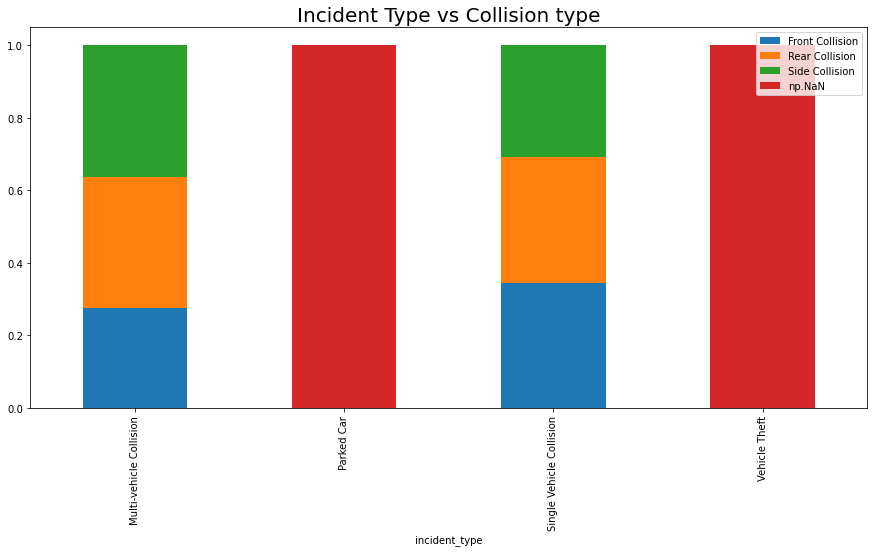

In [22]:
incident = pd.crosstab(df['incident_type'],df['collision_type'])

incident.div(incident.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(15,7))

plt.title('Incident Type vs Collision type',fontsize=20)
plt.legend()
plt.show()

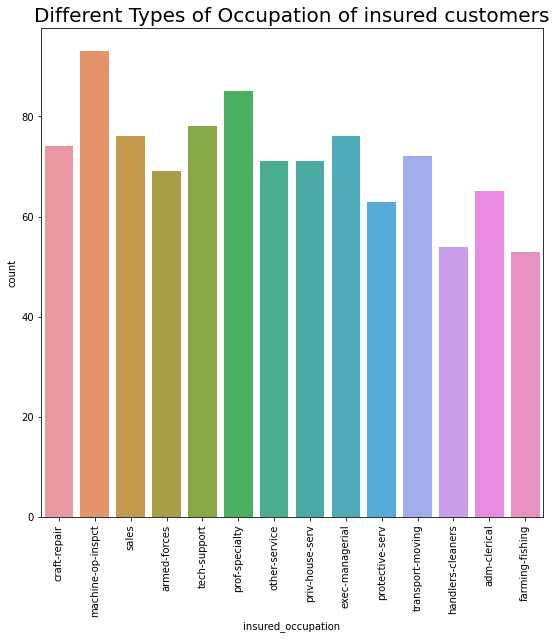

In [23]:
sns.countplot(df['insured_occupation'])
plt.title('Different Types of Occupation of insured customers',fontsize=20)
plt.xticks(rotation=90)
plt.show()

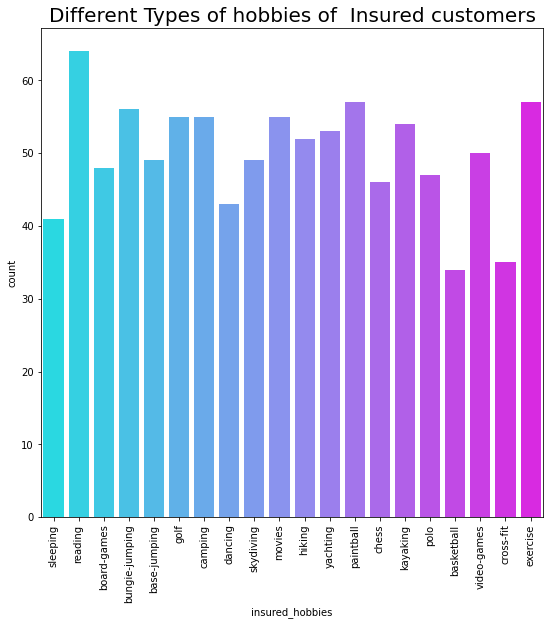

In [24]:
sns.countplot(df['insured_hobbies'],palette='cool')
plt.title('Different Types of hobbies of  Insured customers',fontsize=20)
plt.xticks(rotation=90)
plt.show()

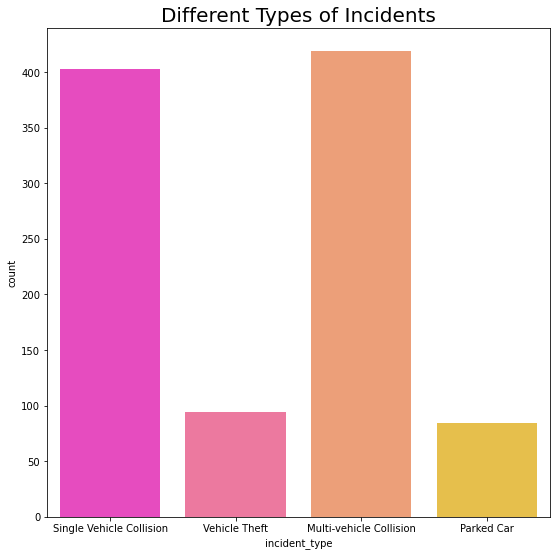

In [25]:
sns.countplot(df['incident_type'],palette='spring')
plt.title('Different Types of Incidents',fontsize=20)
plt.show()

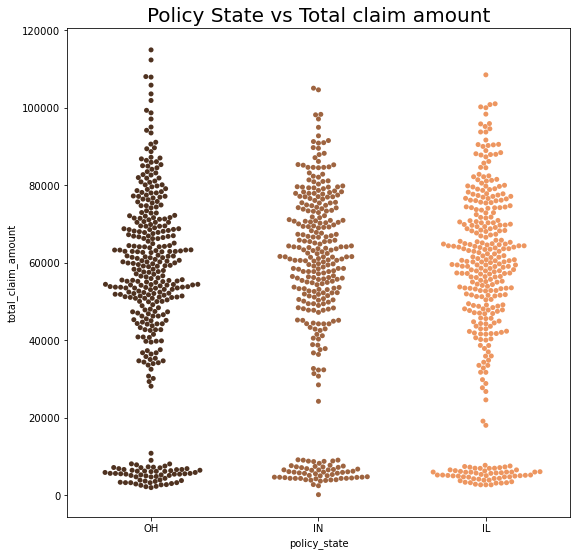

In [26]:
sns.swarmplot(df['policy_state'],df['total_claim_amount'],palette='copper')
plt.title('Policy State vs Total claim amount',fontsize=20)
plt.show()

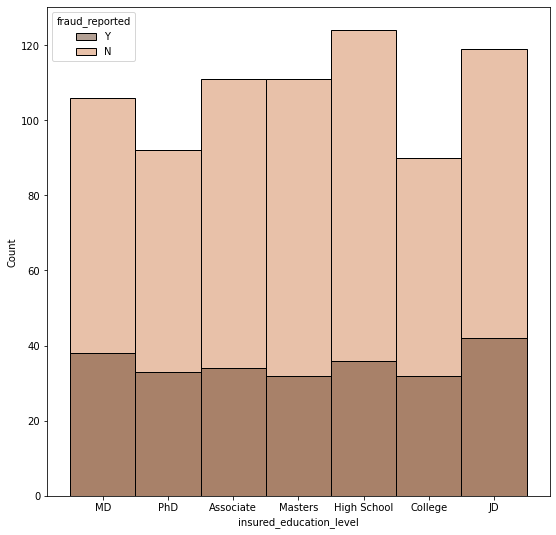

In [27]:
sns.histplot(df,x='insured_education_level',palette='copper',hue='fraud_reported')
plt.show()

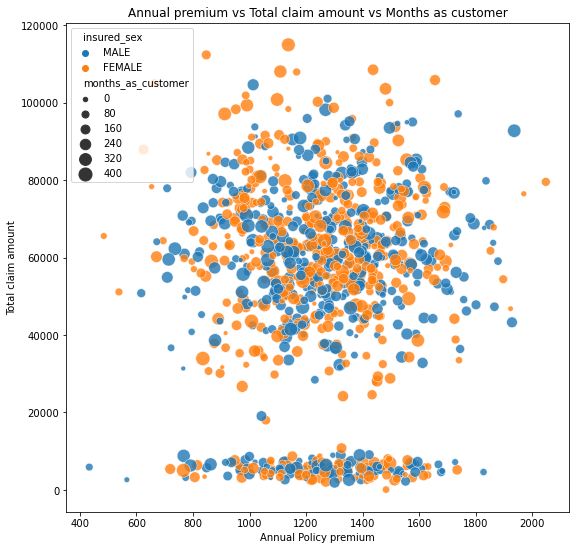

In [28]:
sns.scatterplot(data=df,x='policy_annual_premium',y='total_claim_amount',size='months_as_customer',hue='insured_sex',sizes=(20,200),alpha=0.8)

plt.xlabel('Annual Policy premium')
plt.ylabel('Total claim amount')
plt.title('Annual premium vs Total claim amount vs Months as customer')

plt.show()

In [29]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

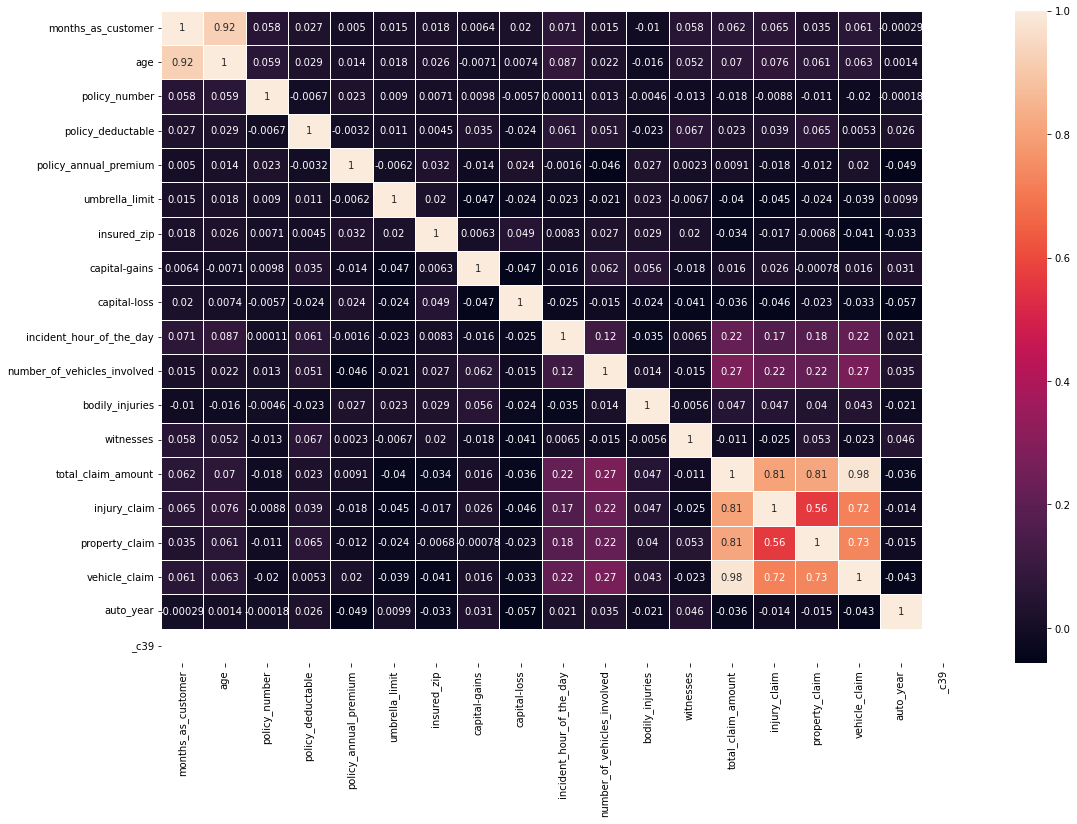

In [30]:
# plotting heat map

plt.figure(figsize=(18,12))
corr = df.corr()
sns.heatmap(data = corr,annot = True,fmt='.2g',linewidth=1)
plt.show()

In [31]:
# Dropping columns which are not necessary  for prediction

df.drop(['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date', 
        'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year','_c39'],inplace=True,axis=1)

In [32]:
df.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,np.NaN,0,0,np.NaN,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,np.NaN,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N


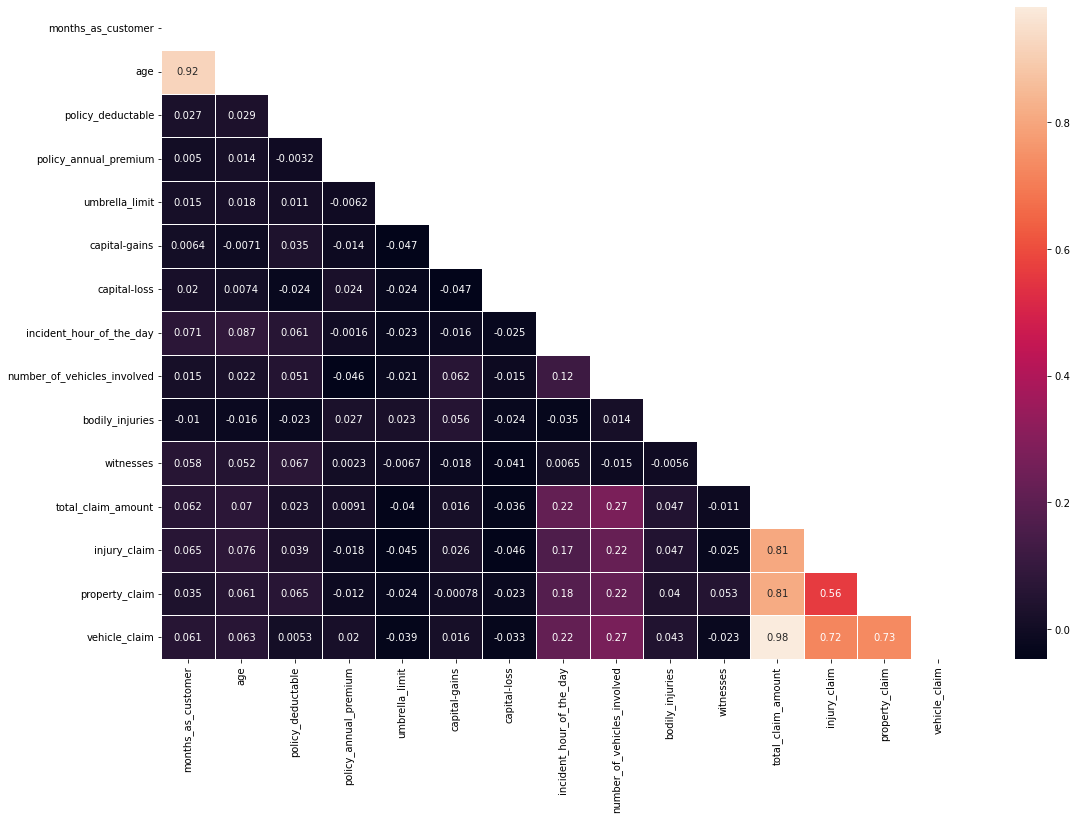

In [33]:
# Checking for multicollinearity

plt.figure(figsize=(18,12))
corr=df.corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(data = corr,mask=mask,annot=True,fmt='.2g',linewidth=1)
plt.show()

from the above plot, we can see that there is high correlation between age and months_as_customer.We will drop the "Age"column

Also there is high correlation  between total_claim_amount, injury_claim,property_claim,vehical_claim, as total claim is the

sum of all others.So we will drop the total claim columns

In [34]:
df.drop(columns=['age','total_claim_amount'],inplace=True,axis=1)

In [35]:
df.head()

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,5,1,YES,1,2,YES,6510,13020,52080,Y
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,8,1,np.NaN,0,0,np.NaN,780,780,3510,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,7,3,NO,2,3,NO,7700,3850,23100,N
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,...,5,1,np.NaN,1,2,NO,6340,6340,50720,Y
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,...,20,1,NO,0,1,NO,1300,650,4550,N


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   policy_csl                   1000 non-null   object 
 2   policy_deductable            1000 non-null   int64  
 3   policy_annual_premium        1000 non-null   float64
 4   umbrella_limit               1000 non-null   int64  
 5   insured_sex                  1000 non-null   object 
 6   insured_education_level      1000 non-null   object 
 7   insured_occupation           1000 non-null   object 
 8   insured_relationship         1000 non-null   object 
 9   capital-gains                1000 non-null   int64  
 10  capital-loss                 1000 non-null   int64  
 11  incident_type                1000 non-null   object 
 12  collision_type               1000 non-null   object 
 13  incident_severity  

In [37]:
# Seperating feature and target column
X=df.drop('fraud_reported',axis=1)
y=df['fraud_reported']

In [38]:
# Extracting and Encoding  Categorical column

cat_df = X.select_dtypes(include=['object'])

In [39]:
cat_df.head()

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,np.NaN,Minor Damage,Police,np.NaN,np.NaN
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO
3,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,np.NaN,NO
4,500/1000,MALE,Associate,sales,unmarried,Vehicle Theft,np.NaN,Minor Damage,None,NO,NO


In [40]:
# Printing unique columns of each column

for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

policy_csl: 
['250/500' '100/300' '500/1000']

insured_sex: 
['MALE' 'FEMALE']

insured_education_level: 
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

insured_occupation: 
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

insured_relationship: 
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

incident_type: 
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

collision_type: 
['Side Collision' 'np.NaN' 'Rear Collision' 'Front Collision']

incident_severity: 
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']

authorities_contacted: 
['Police' 'None' 'Fire' 'Other' 'Ambulance']

property_damage: 
['YES' 'np.NaN' 'NO']

police_report_available: 
['YES' 'np.NaN' 'NO']



In [41]:
cat_df = pd.get_dummies(cat_df,drop_first=True)

In [42]:
cat_df.head()

,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,...,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,property_damage_np.NaN,police_report_available_YES,police_report_available_np.NaN
0,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,1,0
1,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,1,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [43]:
#Extracting the Numerical columns

num_df=X.select_dtypes(include=['int64'])

In [44]:
num_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
0,328,1000,0,53300,0,5,1,1,2,6510,13020,52080
1,228,2000,5000000,0,0,8,1,0,0,780,780,3510
2,134,2000,5000000,35100,0,7,3,2,3,7700,3850,23100
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,6340,50720
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,650,4550


In [45]:
# combing numerical and categorical dataframe  to get  the final dataset

X=pd.concat([num_df,cat_df],axis=1)

In [46]:
X.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,property_damage_np.NaN,police_report_available_YES,police_report_available_np.NaN
0,328,1000,0,53300,0,5,1,1,2,6510,...,0,0,0,0,0,1,1,0,1,0
1,228,2000,5000000,0,0,8,1,0,0,780,...,0,0,0,0,0,1,0,1,0,1
2,134,2000,5000000,35100,0,7,3,2,3,7700,...,0,0,0,0,0,1,0,0,0,0
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,...,0,0,0,0,0,1,0,1,0,0
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,...,0,0,0,1,0,0,0,0,0,0


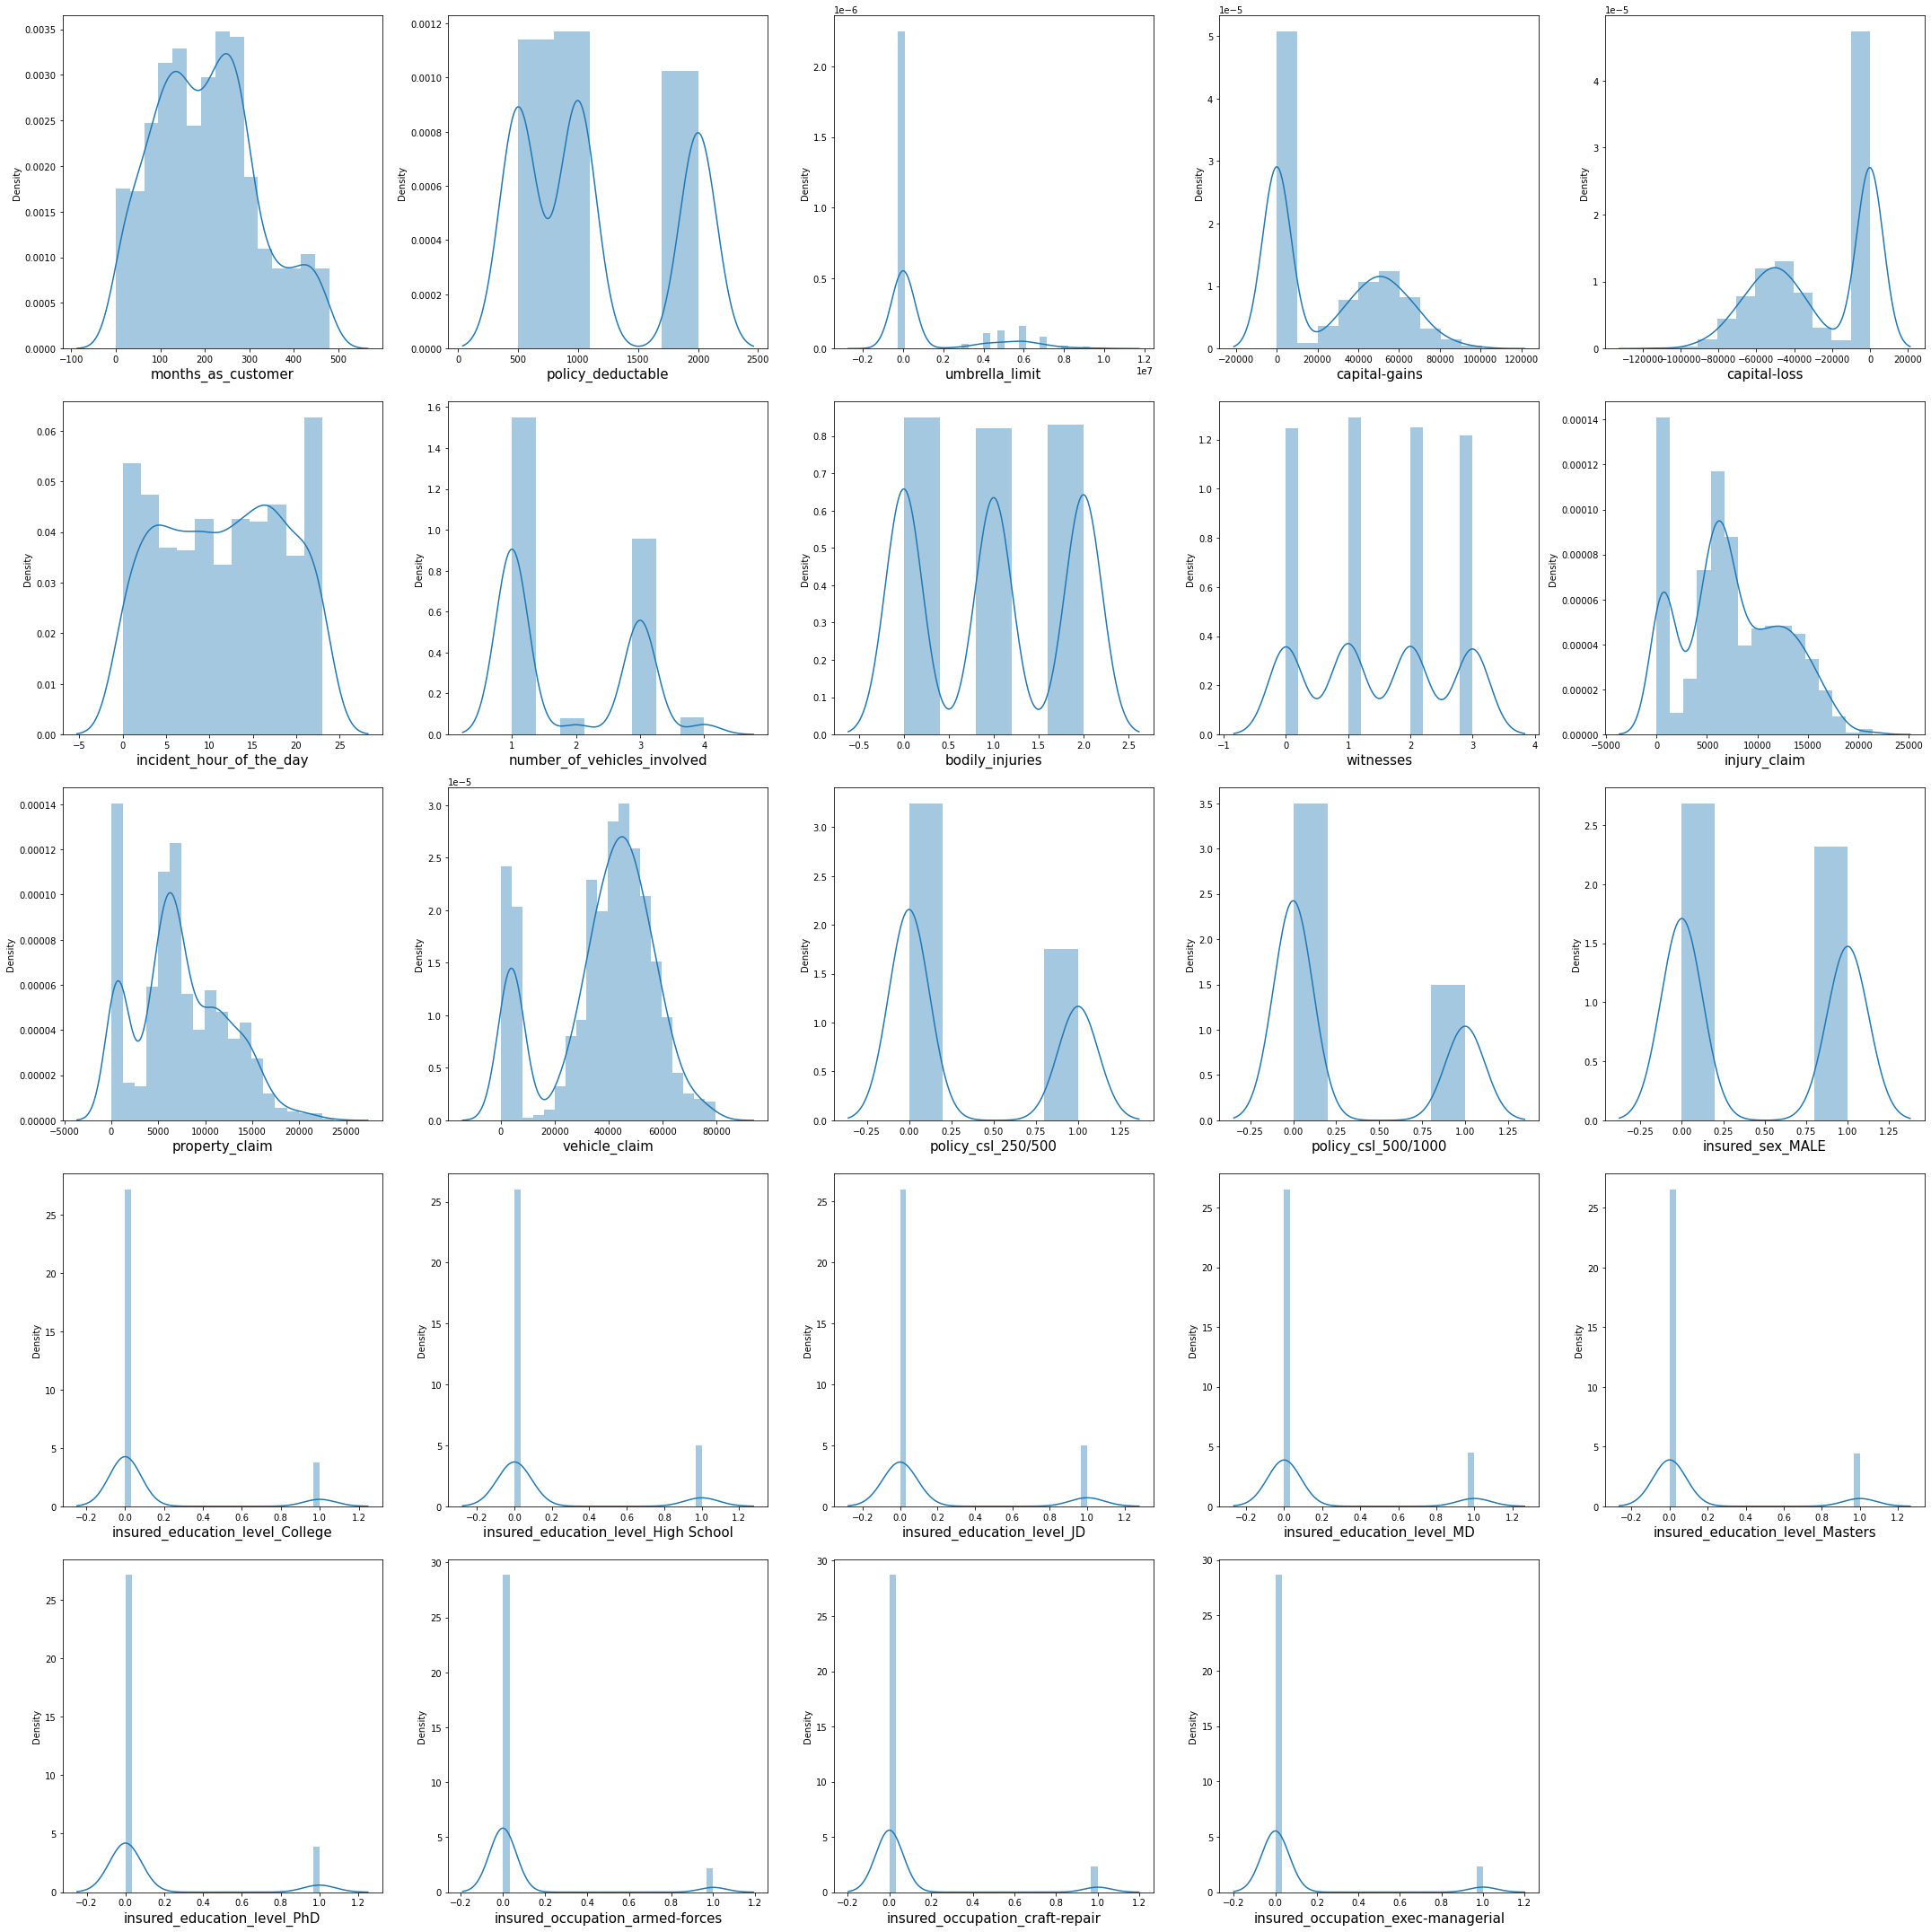

In [47]:
plt.figure(figsize=(30,30))
plotnumber=1

for col in X.columns:
    if plotnumber <=24:
        ax=plt.subplot(5,5,plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col,fontsize=15)
    plotnumber +=1
plt.tight_layout()
plt.show()

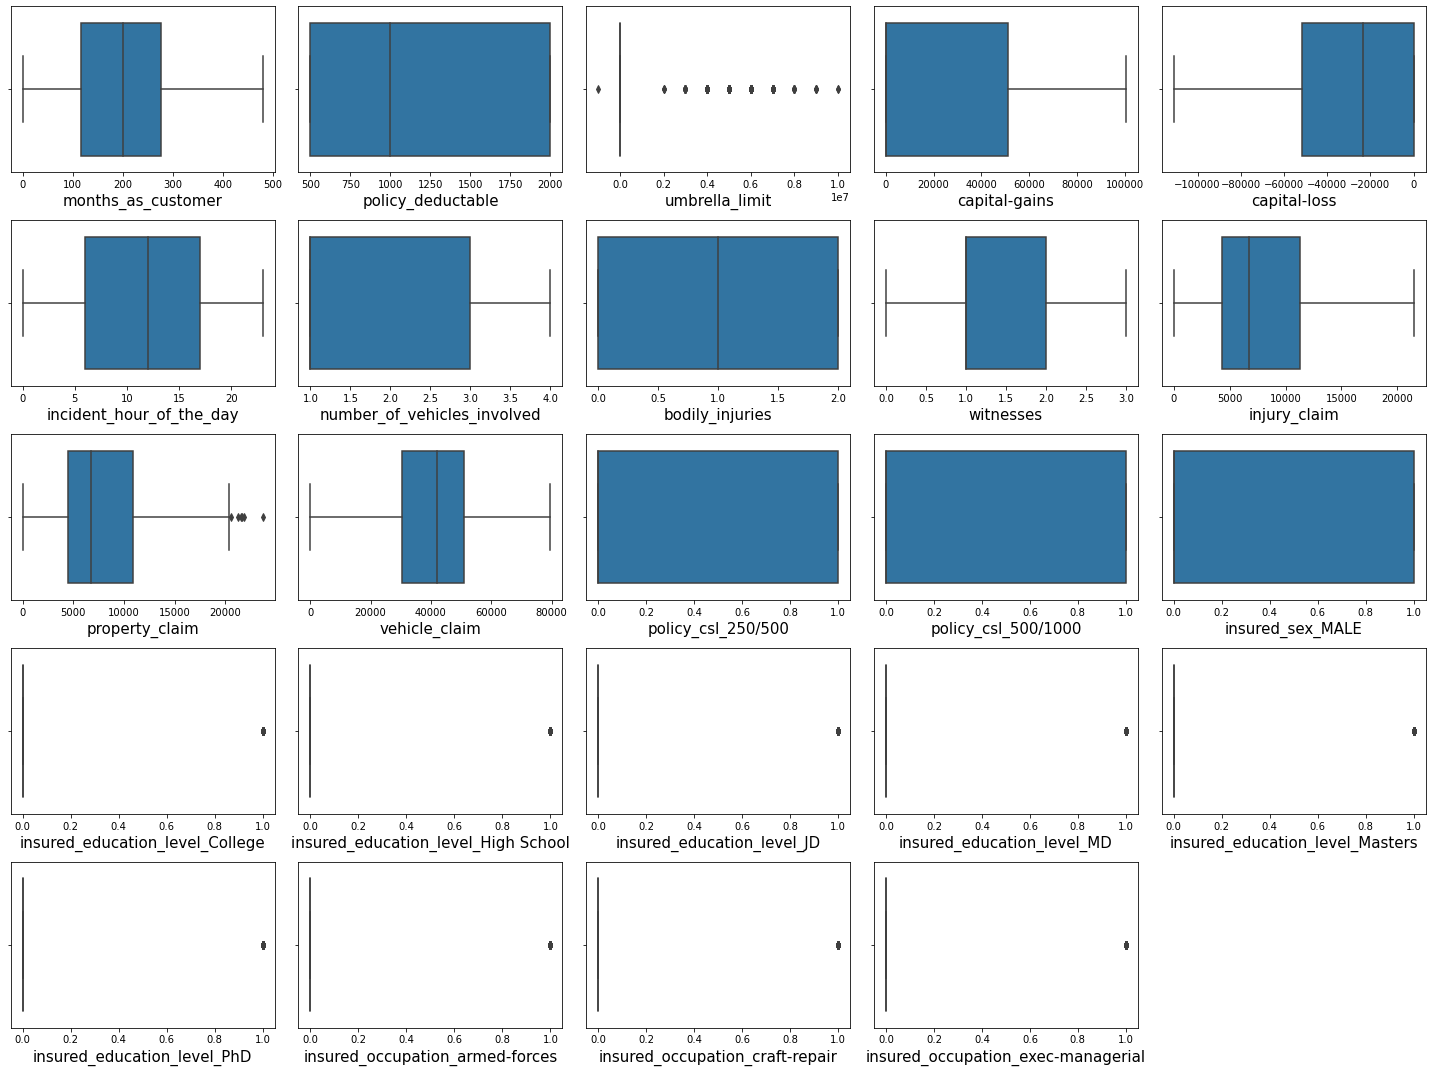

In [48]:
# Data looks good lets check for outliers

plt.figure(figsize=(20,15))
plotnumber=1

for col in X.columns:
    if plotnumber <=24:
        ax=plt.subplot(5,5,plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col,fontsize=15)
    plotnumber +=1
plt.tight_layout()
plt.show()

* Ouliers are present in some numerial columns we will scale numerical columns later



In [49]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [50]:
X_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,property_damage_np.NaN,police_report_available_YES,police_report_available_np.NaN
69,338,1000,0,0,-51500,13,1,0,1,860,...,0,0,0,1,0,0,0,0,0,1
477,380,1000,0,66000,0,10,1,0,1,7270,...,1,0,0,0,0,1,0,1,1,0
167,298,1000,0,0,-51100,18,3,0,0,12800,...,0,0,0,0,0,0,0,0,0,0
767,253,500,0,52900,0,11,3,0,0,5870,...,0,0,0,0,0,0,1,0,0,0
20,460,1000,4000000,0,0,20,3,1,0,0,...,0,0,0,0,0,1,0,0,0,1


In [51]:
# Data considered from above boxplot
num_df=X_train[['months_as_customer','policy_deductable','umbrella_limit','capital-gains','capital-loss','incident_hour_of_the_day','number_of_vehicles_involved','bodily_injuries','witnesses','injury_claim','property_claim','vehicle_claim']]

In [52]:
#Scaling the Numeric values in dataset

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled_data=scaler.fit_transform(num_df)

In [53]:
scaled_num_df=pd.DataFrame(data=scaled_data,columns=num_df.columns,index=X_train.index)
scaled_num_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
69,1.150759,-0.224379,-0.467904,-0.905031,-0.898220,0.218554,-0.839461,-1.182891,-0.439082,-1.324604,-1.339194,-1.826060
477,1.511416,-0.224379,-0.467904,1.427996,0.945750,-0.216619,-0.839461,-1.182891,-0.439082,-0.026944,-0.007675,0.327598
167,0.807276,-0.224379,-0.467904,-0.905031,-0.883898,0.943842,1.131105,-1.182891,-1.341306,1.092566,-0.188396,0.389521
767,0.420858,-1.045278,-0.467904,0.964926,0.945750,-0.071562,1.131105,-1.182891,-1.341306,-0.310364,0.920857,0.502872
20,2.198382,-0.224379,1.299996,-0.905031,0.945750,1.233957,1.131105,0.034075,-1.341306,-1.498705,-0.429357,0.238387


In [54]:
X_train.drop(columns=scaled_num_df.columns,inplace=True)

In [55]:
X_train=pd.concat([scaled_num_df,X_train],axis=1)

In [56]:
X_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,property_damage_np.NaN,police_report_available_YES,police_report_available_np.NaN
69,1.150759,-0.224379,-0.467904,-0.905031,-0.898220,0.218554,-0.839461,-1.182891,-0.439082,-1.324604,...,0,0,0,1,0,0,0,0,0,1
477,1.511416,-0.224379,-0.467904,1.427996,0.945750,-0.216619,-0.839461,-1.182891,-0.439082,-0.026944,...,1,0,0,0,0,1,0,1,1,0
167,0.807276,-0.224379,-0.467904,-0.905031,-0.883898,0.943842,1.131105,-1.182891,-1.341306,1.092566,...,0,0,0,0,0,0,0,0,0,0
767,0.420858,-1.045278,-0.467904,0.964926,0.945750,-0.071562,1.131105,-1.182891,-1.341306,-0.310364,...,0,0,0,0,0,0,1,0,0,0
20,2.198382,-0.224379,1.299996,-0.905031,0.945750,1.233957,1.131105,0.034075,-1.341306,-1.498705,...,0,0,0,0,0,1,0,0,0,1


# Model building

* Support VEctor classifier

In [57]:


from sklearn.svm import SVC

svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

In [58]:
#Accuracy_score,confustion_matrix and classification_report

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

svc_train_acc=accuracy_score(y_train,svc.predict(X_train))
svc_test_acc=accuracy_score(y_test,y_pred)

print(f'Training Accuracy of support vector classifier is: { svc_train_acc}')
print(f'Test accuracy of support vector classifier is: {svc_test_acc}')

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Training Accuracy of support vector classifier is: 0.876
Test accuracy of support vector classifier is: 0.768
[[192   0]
 [ 58   0]]
              precision    recall  f1-score   support

           N       0.77      1.00      0.87       192
           Y       0.00      0.00      0.00        58

    accuracy                           0.77       250
   macro avg       0.38      0.50      0.43       250
weighted avg       0.59      0.77      0.67       250



* KNN Classifier

In [59]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

In [60]:
##Accuracy_score,confustion_matrix and classification_report

knn_train_acc=accuracy_score(y_train,knn.predict(X_train))
knn_test_acc=accuracy_score(y_test,y_pred)

print(f'Training Accuracy of KNN is: {knn_train_acc}')
print(f'Test Accuracy of KNN is:{knn_test_acc}')

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Training Accuracy of KNN is: 0.748
Test Accuracy of KNN is:0.768
[[192   0]
 [ 58   0]]
              precision    recall  f1-score   support

           N       0.77      1.00      0.87       192
           Y       0.00      0.00      0.00        58

    accuracy                           0.77       250
   macro avg       0.38      0.50      0.43       250
weighted avg       0.59      0.77      0.67       250



* Decision Tree Classifier

In [61]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

y_pred=dtc.predict(X_test)

In [62]:
##Accuracy_score,confustion_matrix and classification_report

dtc_train_acc=accuracy_score(y_train,dtc.predict(X_train))
dtc_test_acc=accuracy_score(y_test,y_pred)

print(f"Training accuracy of DecisionTree is: {dtc_train_acc}")
print(f"Test accuracy of Deciosion Tree is: {dtc_test_acc}")

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Training accuracy of DecisionTree is: 1.0
Test accuracy of Deciosion Tree is: 0.288
[[ 30 162]
 [ 16  42]]
              precision    recall  f1-score   support

           N       0.65      0.16      0.25       192
           Y       0.21      0.72      0.32        58

    accuracy                           0.29       250
   macro avg       0.43      0.44      0.29       250
weighted avg       0.55      0.29      0.27       250



* Hyper parameter tuning for best performing model



In [63]:
from sklearn.model_selection import GridSearchCV

grid_params={'criterion':['gini','entropy'],
            'max_depth':[3,5,7,10],
            'min_samples_split':range(2,10,1),
            'min_samples_leaf':range(2,10,1)}

grid_search =  GridSearchCV(dtc,grid_params,cv=5,n_jobs=-1,verbose=1)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [64]:
# best parameters and best score
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 7, 'min_samples_split': 2}
0.8213333333333332


In [65]:
#Best estimator

dtc=grid_search.best_estimator_
y_pred=dtc.predict(X_test)

In [66]:
#Accuracy_score,confustion_matrix and classification_report

dtc_train_acc=accuracy_score(y_train,dtc.predict(X_train))
dtc_test_acc=accuracy_score(y_test,y_pred)

print(f"Training accuracy of decision tree is: {dtc_train_acc}")
print(f"Testing accuracy of decisin tree is:{dtc_test_acc}")

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Training accuracy of decision tree is: 0.8253333333333334
Testing accuracy of decisin tree is:0.772
[[158  34]
 [ 23  35]]
              precision    recall  f1-score   support

           N       0.87      0.82      0.85       192
           Y       0.51      0.60      0.55        58

    accuracy                           0.77       250
   macro avg       0.69      0.71      0.70       250
weighted avg       0.79      0.77      0.78       250



* Random Forest Classifier

In [67]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion='entropy',max_depth=10,max_features='sqrt',min_samples_leaf=1,min_samples_split=3,n_estimators=140)
rand_clf.fit(X_train,y_train)

y_pred = rand_clf.predict(X_test)

In [68]:
#Accuracy_score,confustion_matrix and classification_report

rand_clf_train_acc=accuracy_score(y_train,rand_clf.predict(X_train))
rand_clf_test_acc = accuracy_score(y_test,y_pred)

print(f'Training accuracy of Random forest classifier: {rand_clf_train_acc}')
print(f'Testing accuracy of Random forest classifier: {rand_clf_test_acc}')

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Training accuracy of Random forest classifier: 0.984
Testing accuracy of Random forest classifier: 0.756
[[167  25]
 [ 36  22]]
              precision    recall  f1-score   support

           N       0.82      0.87      0.85       192
           Y       0.47      0.38      0.42        58

    accuracy                           0.76       250
   macro avg       0.65      0.62      0.63       250
weighted avg       0.74      0.76      0.75       250



* Gradient Boosting classifier

In [69]:
from sklearn.ensemble import GradientBoostingClassifier

gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)

##Accuracy_score,confustion_matrix and classification_report

gb_acc=accuracy_score(y_train,gb.predict(X_train))
gb_acc = accuracy_score(y_test,y_pred)

print(f'Training accuracy of GradientBoosting classifier: {accuracy_score(y_train,gb.predict(X_train))}')
print(f'Testing accuracy of Random forest classifier: {gb_acc}\n')

print(f'Confusion marix: - \n{confusion_matrix(y_test,gb.predict(X_test))}\n')
print(f'Classification Report:- \n{classification_report(y_test,gb.predict(X_test))}')

Training accuracy of GradientBoosting classifier: 0.9493333333333334
Testing accuracy of Random forest classifier: 0.756

Confusion marix: - 
[[ 12 180]
 [  1  57]]

Classification Report:- 
              precision    recall  f1-score   support

           N       0.92      0.06      0.12       192
           Y       0.24      0.98      0.39        58

    accuracy                           0.28       250
   macro avg       0.58      0.52      0.25       250
weighted avg       0.76      0.28      0.18       250



In [70]:
# Even Decisin tree is showing high training performance initally after hyper parameter tuning it's performace decreased

# so Random forest classifier taken as best performing model and saving it

import pickle

# saving the model to the local file system
pickle.dump(RandomForestClassifier,open('RandomForestClassifier_model','wb'))

